# **Data Processing**

## Libraryies

In [ ]:
! pip install ipykernel
! pip install notebook
! pip install pandas
! pip install matplotlib 
! pip install seaborn
! pip install plotly 
! pip install openpyxl


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


In [2]:
pd.set_option('display.max_columns', None)

# إعداد الشكل العام للرسومات
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")


## Reading Data

In [ ]:
df = pd.read_csv('cash Cust Sales 21-31 Oct Updated.csv')
df.head(2)

,autoid,cashierid,category,City_Lname,consumer_phone,customer_name,dateid,description,IsDelivery,IsMaksab1,itemclass,itemid,Month1,QuantityValue,reg_Lname,RowTotalVatexc,Staff_Name,store_name,STOREID,sub_category,Supervisor,trans_type1,Transactionnumber,Year1
0,39743248,812,Medicated OTC,Khamis Mushayt,9.668719e+11,Walk-in,20251020,Otrivin Adlt 0.1% 10Ml Dps.,No,Yes,ZMDN,102520,10,3,Asir,33,مصطفى رياض,United Pharmacy 046,P046,Cold & Flu Products,Dr. Hamdi Islam,Normal,251020000046010001,2025
1,39743249,812,Mum Care,Khamis Mushayt,9.668719e+11,Walk-in,20251020,Fam Df141P04 Maxi Os (10X4)X6 (33% Off),No,Yes,ZDPR,400234,10,3,Asir,45,مصطفى رياض,United Pharmacy 046,P046,Feminine Care,Dr. Hamdi Islam,Normal,251020000046010001,2025
2,39743250,812,Medicated OTC,Khamis Mushayt,9.668719e+11,Walk-in,20251020,Fenistil 20Ml Drops.,No,Yes,ZMDN,101275,10,3,Asir,36,مصطفى رياض,United Pharmacy 046,P046,Anti-Allergics,Dr. Hamdi Islam,Normal,251020000046010001,2025
3,39743251,812,Wellness,Khamis Mushayt,9.668719e+11,Walk-in,20251020,Dentinox Drops 100Ml,No,Yes,ZCOS,202714,10,3,Asir,105,مصطفى رياض,United Pharmacy 046,P046,GIT Health,Dr. Hamdi Islam,Normal,251020000046010001,2025
4,39743256,313,Prescribed,Makkah,9.668088e+11,Walk-in,20251020,Coveram 5Mg/5Mg 30Tabs.,No,Yes,ZMDN,100781,10,3,Makkah,205,ابراهيم عبده,United Pharmacy 126,P126,Cardiovascular System,Dr. Ahmed Abdul Latif,Normal,251020000126010001,2025


# data Wrangle

In [142]:
def wrangle(path):
    df = pd.read_csv(path)
    
    #Date Type
    df['dateid'] = pd.to_datetime(df['dateid'], format='%Y%m%d')

    # drop Phone Nulls
    df= df.dropna(subset=['consumer_phone'])

    # phone type
    df['consumer_phone'] = df['consumer_phone'].astype(str).str.replace(r'\.0', '', regex=True)


    # Nulls
    df['sub_category']  = df['sub_category'].fillna('Unknown')
    df['Supervisor']    = df['Supervisor'].fillna('Unknown')
    df['category']      = df['category'].fillna('Unknown')
    
    df_customer = df

    return df_customer

path = "cash Cust Sales 21-31 Oct Updated.csv"
df_customer = wrangle(path)
df_customer.head(3)

,autoid,cashierid,category,City_Lname,consumer_phone,customer_name,dateid,description,IsDelivery,IsMaksab1,itemclass,itemid,Month1,QuantityValue,reg_Lname,RowTotalVatexc,Staff_Name,store_name,STOREID,sub_category,Supervisor,trans_type1,Transactionnumber,Year1
0,39743248,812,Medicated OTC,Khamis Mushayt,966871927987,Walk-in,2025-10-20,Otrivin Adlt 0.1% 10Ml Dps.,No,Yes,ZMDN,102520,10,3,Asir,33,مصطفى رياض,United Pharmacy 046,P046,Cold & Flu Products,Dr. Hamdi Islam,Normal,251020000046010001,2025
1,39743249,812,Mum Care,Khamis Mushayt,966871927987,Walk-in,2025-10-20,Fam Df141P04 Maxi Os (10X4)X6 (33% Off),No,Yes,ZDPR,400234,10,3,Asir,45,مصطفى رياض,United Pharmacy 046,P046,Feminine Care,Dr. Hamdi Islam,Normal,251020000046010001,2025
2,39743250,812,Medicated OTC,Khamis Mushayt,966871927987,Walk-in,2025-10-20,Fenistil 20Ml Drops.,No,Yes,ZMDN,101275,10,3,Asir,36,مصطفى رياض,United Pharmacy 046,P046,Anti-Allergics,Dr. Hamdi Islam,Normal,251020000046010001,2025


In [244]:
# how many unique customers are there?
customer_number =df_customer["consumer_phone"].nunique() 
customer_number
# add to card

285436

# customer_interests Table

In [245]:
customer_interests = df_customer.groupby('consumer_phone').agg({
    "category" : lambda x: pd.Series.mode(x)[0],
    "sub_category" : lambda x: pd.Series.mode(x)[0],
    "City_Lname" : lambda x: pd.Series.mode(x)[0],
    "Transactionnumber": 'nunique',
    "RowTotalVatexc": 'sum',
}).reset_index()


# Rename columns
customer_interests = customer_orders.rename(columns={
    "category": "interst_category",
    "sub_category": "interst_sub_category",
    "Transactionnumber": "orders_number_",
    "RowTotalVatexc": "Sales_per_interest",
})
customer_interests.head(3)

,consumer_phone,interst_category,interst_sub_category,City_Lname,orders_number_,Sales_per_interest
0,806067797,Mum Care,Maternity Needs,At Taif,1,99
1,806878608,Medicated OTC,Analgesics,Makkah,2,91
2,879917776,Mum Care,Maternity Needs,At Taif,1,60


# Customer Sales

In [247]:
customer_sales = df_customer.groupby('consumer_phone').agg({'RowTotalVatexc':'sum',
                                                             'Transactionnumber':'nunique'
                                                             }).reset_index()

customer_sales = customer_sales.sort_values(by='RowTotalVatexc', ascending=False)
customer_sales = customer_sales.rename(columns={
    "RowTotalVatexc": "Sales",
    "Transactionnumber": "Orders_Number"
})

customer_sales.head(3)    

,consumer_phone,Sales,Orders_Number
6626,966800818691,177959,8
108331,966866718982,45219,26
217347,966886071891,36287,31


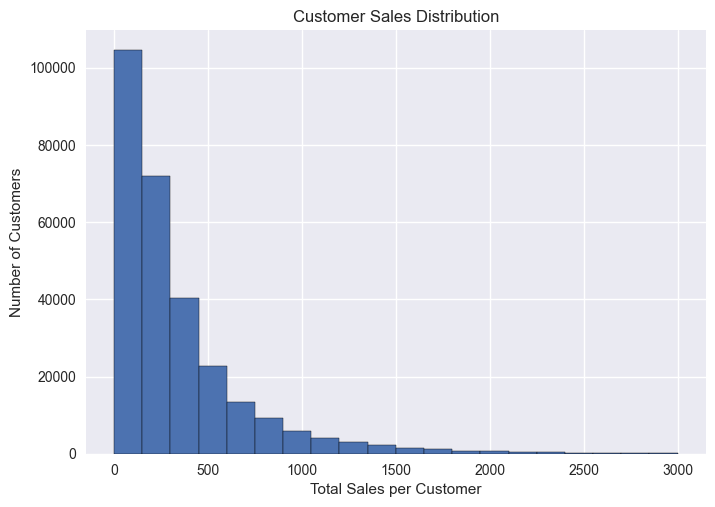

In [248]:
# to avoid outliers  : -ve , very high sales
customer_sales_Filter = customer_sales[
    (customer_sales['Sales'] >= 0) & (customer_sales['Sales'] <= 3000)
]


customer_sales_destribution =customer_sales_Filter["Sales"]

customer_sales_destribution.plot(kind= "hist",
                                  bins=20,
                                  title='Customer Sales Distribution',
                                  edgecolor='black',
                                  )

plt.xlabel('Total Sales per Customer')
plt.ylabel('Number of Customers')
plt.show()

In [249]:
# 1- Top_customer_sales with sales more than 1000
Top_customer_sales = customer_sales[customer_sales['Sales'] >= 1000]                              
Top_customer_sales = Top_customer_sales.sort_values(by='Sales', ascending=False)
Top_customer_sales

,consumer_phone,Sales,Orders_Number
6626,966800818691,177959,8
108331,966866718982,45219,26
217347,966886071891,36287,31
4248,966800681962,34064,2
60033,966808781270,33921,5
...,...,...,...
23485,966806079782,1000,4
94284,966862702928,1000,2
14108,966801829718,1000,1
79252,966860827680,1000,5


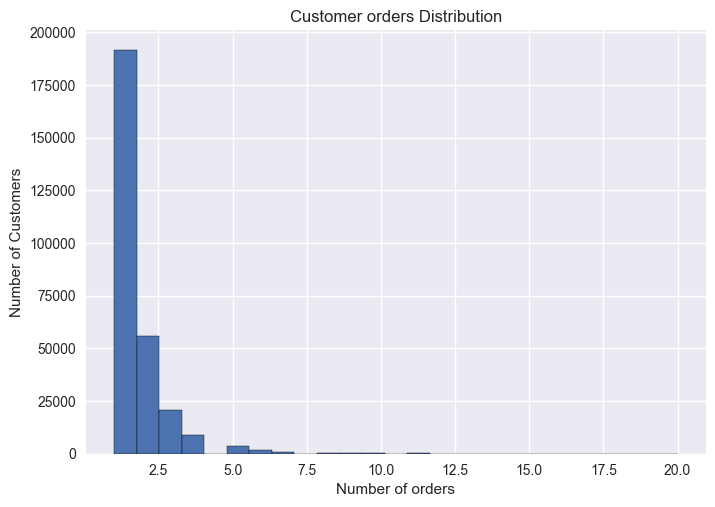

In [250]:
# to avoid outliers  : very high orders number like 175 orders
order_filter = customer_sales[customer_sales["Orders_Number"] <= 20]

order_filter['Orders_Number'].plot(kind= "hist",
                                  bins=25,
                                  title='Customer orders Distribution',
                                  edgecolor='black',
                                  )

plt.xlabel('Number of orders')
plt.ylabel('Number of Customers')
plt.show()

In [251]:
# 2- Top_customer_frequancy with more than 4 orders
Top_customer_frequancy = customer_sales[customer_sales['Orders_Number'] >= 4]                              
Top_customer_frequancy = Top_customer_frequancy.sort_values(by='Orders_Number', ascending=False)
Top_customer_frequancy

,consumer_phone,Sales,Orders_Number
169239,966876712779,12981,178
171651,966876879871,28075,103
185768,966878687870,8309,63
161234,966872192887,6110,57
189079,966878886802,26968,56
...,...,...,...
31352,966806762609,0,4
65345,966809029209,0,4
216990,966886061627,38,4
55609,966808666699,40,4


In [265]:
#  SAVE
Top_customer_sales.to_excel('Top_customer_sales.xlsx', index=False)
Top_customer_frequancy.to_excel('Top_customer_frequancy.xlsx', index=False)
customer_interests.to_excel('customer_interests.xlsx', index=False)

# Final Scribt

In [266]:

def wrangle(path):
    df = pd.read_csv(path)
    
    df['dateid'] = pd.to_datetime(df['dateid'], format='%Y%m%d')
   
    df= df.dropna(subset=['consumer_phone'])
    df['consumer_phone'] = df['consumer_phone'].astype(str).str.replace(r'\.0', '', regex=True)

    df['sub_category']  = df['sub_category'].fillna('Unknown')
    df['Supervisor']    = df['Supervisor'].fillna('Unknown')
    df['category']      = df['category'].fillna('Unknown')
    
    df_customer = df

    return df_customer

path = "cash Cust Sales 21-31 Oct Updated.csv"
df_customer = wrangle(path)
df_customer.head(3)



# customer_interests sheet
customer_interests = df_customer.groupby('consumer_phone').agg({
    "category" : lambda x: pd.Series.mode(x)[0],
    "sub_category" : lambda x: pd.Series.mode(x)[0],
    "City_Lname" : lambda x: pd.Series.mode(x)[0],
    "Transactionnumber": 'nunique',
    "RowTotalVatexc": 'sum',
}).reset_index()

customer_interests = customer_orders.rename(columns={
    "category": "interst_category",
    "sub_category": "interst_sub_category",
    "Transactionnumber": "orders_number_",
    "RowTotalVatexc": "Sales_per_interest",
})


# -------------------------------------------------


# Top customer_sales
customer_sales = df_customer.groupby('consumer_phone'
                              ).agg({'RowTotalVatexc':'sum',
                                     'Transactionnumber':'nunique'
                                      }).reset_index()

customer_sales = customer_sales.sort_values(by='RowTotalVatexc', ascending=False)
customer_sales = customer_sales.rename(columns={
    "RowTotalVatexc": "Sales",
    "Transactionnumber": "Orders_Number"
})

# 1- Top_customer_sales with sales more than 1000
Top_customer_sales = customer_sales[customer_sales['Sales'] >= 1000]                              
Top_customer_sales = Top_customer_sales.sort_values(by='Sales', ascending=False)


# -------------------------------------------------

customer_sales = df_customer.groupby('consumer_phone'
                                     ).agg({'RowTotalVatexc':'sum',
                                            'Transactionnumber':'nunique'
                                            }).reset_index()

customer_sales = customer_sales.sort_values(by='RowTotalVatexc', ascending=False)
customer_sales = customer_sales.rename(columns={
    "RowTotalVatexc": "Sales",
    "Transactionnumber": "Orders_Number"
})

# 2- Top_customer_frequancy with more than 4 orders
Top_customer_frequancy = customer_sales[customer_sales['Orders_Number'] >= 4]                              
Top_customer_frequancy = Top_customer_frequancy.sort_values(by='Orders_Number', ascending=False)

# -------------------------------------------------





#  SAVE 3 sheets
Top_customer_sales.to_excel('Top_customer_sales.xlsx', index=False)
Top_customer_frequancy.to_excel('Top_customer_frequancy.xlsx', index=False)
customer_interests.to_excel('customer_interests.xlsx', index=False)